# Import libraries

In [1]:
import numpy as np
import pandas as pd

# Implementing the neural network from skratch

In [2]:
class Layer:
    def __init__(self):
        self.input = None
        self.output = None

    def forward_prop(self, input):
        return

    def back_prop(self, d, learning_rate):
        return

In [3]:
class FCLayer(Layer):
    def __init__(self, input_size, output_size):
        self.weights = np.random.randn(output_size, input_size)
        self.bias = np.random.randn(output_size, 1)

    def forward_prop(self, input):
        self.input = input
        self.output = np.dot(self.weights, self.input) + self.bias
        return self.output

    def back_prop(self, d, learning_rate):
        dw = np.dot(d, self.input.T)
        
        self.weights -= learning_rate * dw
        self.bias -= learning_rate * d
        
        da = np.dot(self.weights.T, d)
        return da

In [4]:
class ActivationLayer(Layer):
    def __init__(self, activation, activation_prime):
        self.activation = activation
        self.activation_prime = activation_prime

    def forward_prop(self, input):
        self.input = input
        self.output = self.activation(self.input)
        return self.output

    def back_prop(self, d, learning_rate):
        return d * self.activation_prime(self.input)

In [5]:
def train(network, loss, loss_prime, x_train, y_train, epochs = 1000, learning_rate = 0.1):
    for e in range(epochs):
        l = 0
        for x, y in zip(x_train, y_train):
            # forward
            output = x
            for layer in network:
                output = layer.forward_prop(output)

            # error
            l += loss(y, output)

            # backward
            grad = loss_prime(y, output)
            for layer in reversed(network):
                grad = layer.back_prop(grad, learning_rate)

        l /= len(x_train)
        print(f"{e + 1}/{epochs}, error={l}")
            
def test(network, input):
    output = input
    for layer in network:
        output = layer.forward_prop(output)
    return output

In [6]:
def tanh(x):
    return np.tanh(x)

def tanh_prime(x):
    return 1 - np.tanh(x) ** 2


def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_prime(x):
    return sigmoid(x) * (1 - sigmoid(x))

In [7]:
def mse(y_true, y_hat):
    return np.mean(np.power(y_true - y_hat, 2))

def mse_prime(y_true, y_hat):
    return 2 * (y_hat - y_true) / np.size(y_true)

def lg(y_true, y_hat):
    return np.mean(-y_true * np.log(y_hat) - (1 - y_true) * np.log(1 - y_hat))

def lg_prime(y_true, y_hat):
    return ((1 - y_true) / (1 - y_hat) - y_true / y_hat) / np.size(y_true)

# Import the data

In [9]:
loan_train = pd.read_csv('C:/Users/Saberi/Desktop/nf2/loan-train.csv')
loan_test = pd.read_csv('C:/Users/Saberi/Desktop/nf2/loan-test.csv')

In [10]:
loan_train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [11]:
loan_test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [12]:
loan_train.nunique()

Loan_ID              614
Gender                 2
Married                2
Dependents             4
Education              2
Self_Employed          2
ApplicantIncome      505
CoapplicantIncome    287
LoanAmount           203
Loan_Amount_Term      10
Credit_History         2
Property_Area          3
Loan_Status            2
dtype: int64

# Cleaning the data

In [13]:
#omitting unnecessary variables
loan_train=loan_train.drop(['Loan_ID'],axis=1)
loan_test=loan_test.drop(['Loan_ID'],axis=1)

In [14]:
print( loan_train.shape)
print(loan_test.shape)

(614, 12)
(367, 11)


In [15]:
loan_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             601 non-null    object 
 1   Married            611 non-null    object 
 2   Dependents         599 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      582 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         592 non-null    float64
 8   Loan_Amount_Term   600 non-null    float64
 9   Credit_History     564 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 57.7+ KB


In [16]:
loan_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             356 non-null    object 
 1   Married            367 non-null    object 
 2   Dependents         357 non-null    object 
 3   Education          367 non-null    object 
 4   Self_Employed      344 non-null    object 
 5   ApplicantIncome    367 non-null    int64  
 6   CoapplicantIncome  367 non-null    int64  
 7   LoanAmount         362 non-null    float64
 8   Loan_Amount_Term   361 non-null    float64
 9   Credit_History     338 non-null    float64
 10  Property_Area      367 non-null    object 
dtypes: float64(3), int64(2), object(6)
memory usage: 31.7+ KB


In [17]:
na_feature=pd.DataFrame({"column_name":list(loan_train.columns),"number_of_NaN":list(loan_train.isna().sum(axis=0))})
na_feature = na_feature.sort_values(by=['number_of_NaN'], ascending=False)
na_feature.head(12)

,column_name,number_of_NaN
9,Credit_History,50
4,Self_Employed,32
7,LoanAmount,22
2,Dependents,15
8,Loan_Amount_Term,14
0,Gender,13
1,Married,3
3,Education,0
5,ApplicantIncome,0
6,CoapplicantIncome,0


In [18]:
na_feature=pd.DataFrame({"column_name":list(loan_test.columns),"number_of_NaN":list(loan_test.isna().sum(axis=0))})
na_feature = na_feature.sort_values(by=['number_of_NaN'], ascending=False)
na_feature.head(12)

,column_name,number_of_NaN
9,Credit_History,29
4,Self_Employed,23
0,Gender,11
2,Dependents,10
8,Loan_Amount_Term,6
7,LoanAmount,5
1,Married,0
3,Education,0
5,ApplicantIncome,0
6,CoapplicantIncome,0


In [19]:
loan_train['Credit_History'].fillna(loan_train['Credit_History'].mode()[0], inplace=True) 
loan_test['Credit_History'].fillna(loan_test['Credit_History'].mode()[0], inplace=True)


loan_train['LoanAmount'].fillna(loan_train['LoanAmount'].mean(), inplace=True)
loan_test['LoanAmount'].fillna(loan_test['LoanAmount'].mean(), inplace=True) 

loan_train['Loan_Amount_Term'].fillna(loan_train['Loan_Amount_Term'].mode()[0], inplace=True) 
loan_test['Loan_Amount_Term'].fillna(loan_test['Loan_Amount_Term'].mode()[0], inplace=True) 

loan_train['Gender'].fillna(loan_train['Gender'].mode()[0], inplace=True)
loan_test['Gender'].fillna(loan_test['Gender'].mode()[0], inplace=True)

loan_train['Dependents'].fillna(loan_train['Dependents'].mode()[0], inplace=True)
loan_test['Dependents'].fillna(loan_test['Dependents'].mode()[0], inplace=True)

loan_train['Married'].fillna(loan_train['Married'].mode()[0], inplace=True)
loan_test['Married'].fillna(loan_test['Married'].mode()[0], inplace=True)

loan_train['Self_Employed'].fillna(loan_train['Self_Employed'].mode()[0], inplace=True)
loan_test['Self_Employed'].fillna(loan_test['Self_Employed'].mode()[0], inplace=True)

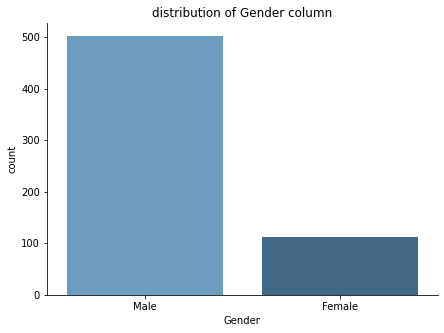

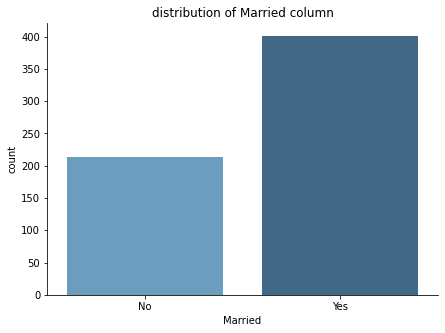

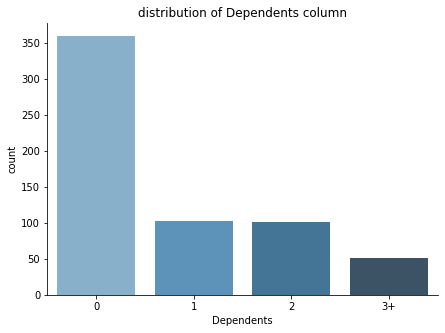

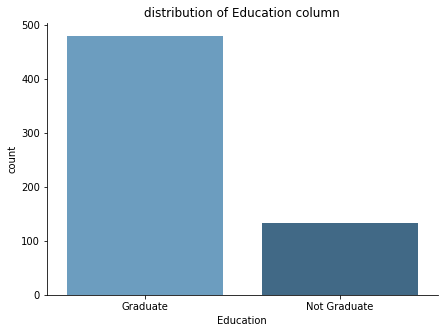

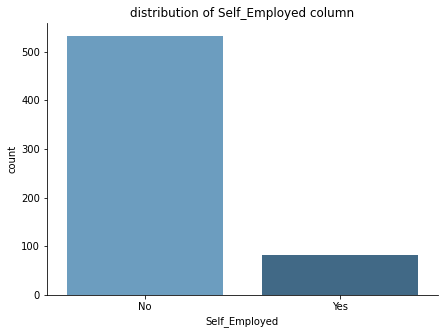

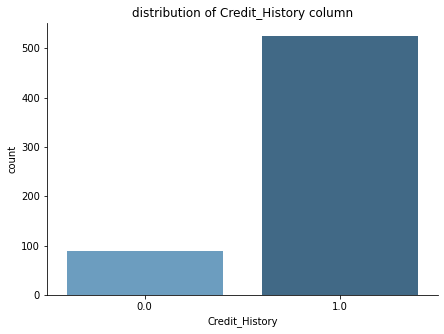

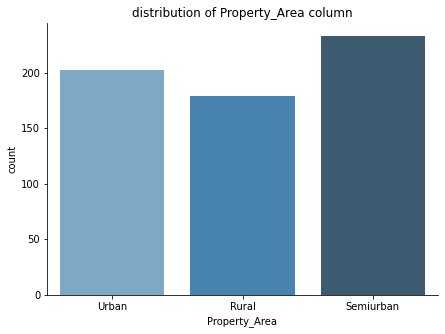

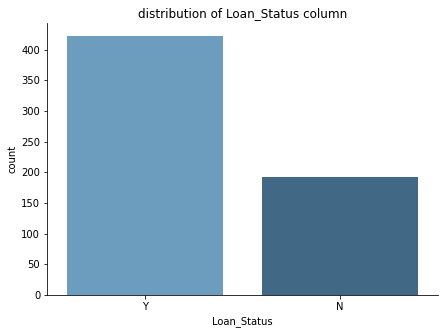

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
for i in ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Credit_History', 'Property_Area', 'Loan_Status']:
  plt.figure(figsize=(7,5))
  sns.countplot(x=loan_train[i],palette='Blues_d').set(title=f'distribution of {i} column')
  sns.despine(top=True, right=True, left=False, bottom=False)
  plt.show()

In [21]:
loan_train['Dependents'] = loan_train['Dependents'].replace(['3+'],3)

In [22]:
loan_train['Dependents']=loan_train['Dependents'].astype(int)

In [23]:
loan_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    object 
 1   Married            614 non-null    object 
 2   Dependents         614 non-null    int32  
 3   Education          614 non-null    object 
 4   Self_Employed      614 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         614 non-null    float64
 8   Loan_Amount_Term   614 non-null    float64
 9   Credit_History     614 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(4), int32(1), int64(1), object(6)
memory usage: 55.3+ KB


In [24]:
loan_test['Dependents'] = loan_test['Dependents'].replace(['3+'],3)
loan_test['Dependents']=loan_test['Dependents'].astype(int)

In [25]:
loan_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             367 non-null    object 
 1   Married            367 non-null    object 
 2   Dependents         367 non-null    int32  
 3   Education          367 non-null    object 
 4   Self_Employed      367 non-null    object 
 5   ApplicantIncome    367 non-null    int64  
 6   CoapplicantIncome  367 non-null    int64  
 7   LoanAmount         367 non-null    float64
 8   Loan_Amount_Term   367 non-null    float64
 9   Credit_History     367 non-null    float64
 10  Property_Area      367 non-null    object 
dtypes: float64(3), int32(1), int64(2), object(5)
memory usage: 30.2+ KB


In [26]:
loan_train.nunique()

Gender                 2
Married                2
Dependents             4
Education              2
Self_Employed          2
ApplicantIncome      505
CoapplicantIncome    287
LoanAmount           204
Loan_Amount_Term      10
Credit_History         2
Property_Area          3
Loan_Status            2
dtype: int64

In [27]:
loan_train.Loan_Status = loan_train.Loan_Status.replace({"Y": 1, "N" : 0})

gen_train=pd.get_dummies(loan_train["Gender"])
gen_test=pd.get_dummies(loan_test["Gender"])

mar_train=pd.get_dummies(loan_train["Married"])
mar_test=pd.get_dummies(loan_test["Married"])

edu_train=pd.get_dummies(loan_train["Education"])
edu_test=pd.get_dummies(loan_test["Education"])

emp_train=pd.get_dummies(loan_train["Self_Employed"])
emp_test=pd.get_dummies(loan_test["Self_Employed"])

cer_train=pd.get_dummies(loan_train["Credit_History"])
cer_test=pd.get_dummies(loan_test["Credit_History"])

prop_train=pd.get_dummies(loan_train["Property_Area"])
prop_test=pd.get_dummies(loan_test["Property_Area"])

In [28]:
loan_train=pd.concat([loan_train,gen_train,mar_train,edu_train,emp_train,cer_train,prop_train],axis=1)

In [29]:
loan_train=loan_train.drop(['Gender','Married','Education','Self_Employed','Credit_History','Property_Area'],axis=1)

In [30]:
loan_test=pd.concat([loan_test,gen_test,mar_test,edu_test,emp_test,cer_test,prop_test],axis=1)

In [31]:
loan_test=loan_test.drop(['Gender','Married','Education','Self_Employed','Credit_History','Property_Area'],axis=1)

In [32]:
loan_train['Dependents']=loan_train['Dependents']/max(loan_train['Dependents'])
loan_train['ApplicantIncome']=loan_train['ApplicantIncome']/max(loan_train['ApplicantIncome'])
loan_train['CoapplicantIncome']=loan_train['CoapplicantIncome']/max(loan_train['CoapplicantIncome'])
loan_train['LoanAmount']=loan_train['LoanAmount']/max(loan_train['LoanAmount'])
loan_train['Loan_Amount_Term']=loan_train['Loan_Amount_Term']/max(loan_train['Loan_Amount_Term'])

In [33]:
loan_train.head()

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Loan_Status,Female,Male,No,Yes,Graduate,Not Graduate,No,Yes,0.0,1.0,Rural,Semiurban,Urban
0,0.000000,0.072210,0.000000,0.209160,0.75,1,0,1,1,0,1,0,1,0,0,1,0,0,1
1,0.333333,0.056580,0.036192,0.182857,0.75,0,0,1,0,1,1,0,1,0,0,1,1,0,0
2,0.000000,0.037037,0.000000,0.094286,0.75,1,0,1,0,1,1,0,0,1,0,1,0,0,1
3,0.000000,0.031889,0.056592,0.171429,0.75,1,0,1,0,1,0,1,1,0,0,1,0,0,1
4,0.000000,0.074074,0.000000,0.201429,0.75,1,0,1,1,0,1,0,1,0,0,1,0,0,1


In [34]:
loan_test['Dependents']=loan_test['Dependents']/max(loan_test['Dependents'])
loan_test['ApplicantIncome']=loan_test['ApplicantIncome']/max(loan_test['ApplicantIncome'])
loan_test['CoapplicantIncome']=loan_test['CoapplicantIncome']/max(loan_test['CoapplicantIncome'])
loan_test['LoanAmount']=loan_test['LoanAmount']/max(loan_test['LoanAmount'])
loan_test['Loan_Amount_Term']=loan_test['Loan_Amount_Term']/max(loan_test['Loan_Amount_Term'])

In [35]:
loan_test.head()

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Female,Male,No,Yes,Graduate,Not Graduate,No,Yes,0.0,1.0,Rural,Semiurban,Urban
0,0.000000,0.078865,0.000000,0.200000,0.75,0,1,0,1,1,0,1,0,0,1,0,0,1
1,0.333333,0.042411,0.062500,0.229091,0.75,0,1,0,1,1,0,1,0,0,1,0,0,1
2,0.666667,0.068938,0.075000,0.378182,0.75,0,1,0,1,1,0,1,0,0,1,0,0,1
3,0.666667,0.032263,0.106083,0.181818,0.75,0,1,0,1,1,0,1,0,0,1,0,0,1
4,0.000000,0.045168,0.000000,0.141818,0.75,0,1,1,0,0,1,1,0,0,1,0,0,1


In [36]:
print( loan_train.shape)
print(loan_test.shape)

(614, 19)
(367, 18)


In [47]:
Y = np.array(loan_train[['Loan_Status']])
X = np.array(loan_train.drop('Loan_Status',axis=1))
X_train = X[0:552,:]
y_train = Y[0:552,:]
x = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
y = y_train.reshape(y_train.shape[0], 1, 1)
print(x.shape)
print(y.shape)

(552, 18, 1)
(552, 1, 1)


## Classification with the model we wrote

In [48]:
network = [
    FCLayer(18, 16),
    ActivationLayer(tanh, tanh_prime),
    FCLayer(16, 8),
    ActivationLayer(tanh, tanh_prime),
    FCLayer(8, 4),
    ActivationLayer(tanh, tanh_prime),
    FCLayer(4, 2),
    ActivationLayer(tanh, tanh_prime),
    FCLayer(2, 1),
    ActivationLayer(sigmoid, sigmoid_prime)
]

# train
train(network, lg, lg_prime, x, y, epochs=100, learning_rate=0.001) 

1/100, error=0.8161297841658882
2/100, error=0.7081345660116465
3/100, error=0.6569141261921364
4/100, error=0.629274783105168
5/100, error=0.6140812805832634
6/100, error=0.6051482461705369
7/100, error=0.5996051813768919
8/100, error=0.5959948056545588
9/100, error=0.5933406870955561
10/100, error=0.5911319047902833
11/100, error=0.5891148489130592
12/100, error=0.5871648176806582
13/100, error=0.585217232590153
14/100, error=0.5832253754293905
15/100, error=0.581136629310759
16/100, error=0.5788790698950589
17/100, error=0.576371932961795
18/100, error=0.5735742358167203
19/100, error=0.5704703523610769
20/100, error=0.5670497524447764
21/100, error=0.5634339608716004
22/100, error=0.5598651009172172
23/100, error=0.556441704198462
24/100, error=0.5531569894374252
25/100, error=0.5500173688349999
26/100, error=0.547028464685276
27/100, error=0.5442985371433903
28/100, error=0.5418515273650063
29/100, error=0.5396293507627006
30/100, error=0.5375542693477695
31/100, error=0.535543405

In [49]:
X_test = X[553:,:]
Y_test = Y[553:,:]
x_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)
y_test = Y_test.reshape(Y_test.shape[0], 1, 1)
#x_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)
pred = []
for x in x_test:
    output = test(network, x)
    prediction = np.where(output > 0.5, 1, 0)
    pred.append(prediction)
y_hat = np.array(pred)

In [50]:
100 - np.sum(abs(y_hat-y_test))/y_hat.shape[0]*100

83.60655737704919

In [51]:
Y = np.array(loan_train[['LoanAmount']])
X = np.array(loan_train.drop(['Loan_Status','LoanAmount'],axis=1))
x = X.reshape(X.shape[0], X.shape[1], 1)
y = Y.reshape(Y.shape[0], 1, 1)
print(X.shape)
print(Y.shape)

(614, 17)
(614, 1)


# Regression with the model we wrote

In [52]:
network = [
    FCLayer(17, 16),
    ActivationLayer(tanh, tanh_prime),
    FCLayer(16, 8),
    ActivationLayer(tanh, tanh_prime),
    FCLayer(8, 4),
    ActivationLayer(tanh, tanh_prime),
    FCLayer(4, 2),
    ActivationLayer(tanh, tanh_prime),
    FCLayer(2, 1)
]

# train
train(network, mse, mse_prime, x, y, epochs=100, learning_rate=0.1)

1/100, error=0.026467586973912112
2/100, error=0.02054588638284492
3/100, error=0.020492419735201602
4/100, error=0.020440642417459725
5/100, error=0.020392804162560785
6/100, error=0.02033836180099685
7/100, error=0.02025749932565118
8/100, error=0.02010243347997727
9/100, error=0.019936745004913332
10/100, error=0.01985634600142952
11/100, error=0.019801513193542456
12/100, error=0.019753341175795355
13/100, error=0.01970769042068609
14/100, error=0.019664905611929198
15/100, error=0.019618113235820783
16/100, error=0.019562804778036548
17/100, error=0.019500352232464
18/100, error=0.019431769101427326
19/100, error=0.01936307639372592
20/100, error=0.019309080074170707
21/100, error=0.019265094316852964
22/100, error=0.019215588128747123
23/100, error=0.019161862629993077
24/100, error=0.019104740383564692
25/100, error=0.019051229770182792
26/100, error=0.019005733446775926
27/100, error=0.01896102760222322
28/100, error=0.018909196069334097
29/100, error=0.018843752168082893
30/10

In [53]:
Y_test = np.array(loan_test[['LoanAmount']])
X_test = np.array(loan_test.drop(['LoanAmount'],axis=1))
X_test.shape

(367, 17)

In [54]:
x_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)
y_test = Y_test.reshape(Y_test.shape[0], 1, 1)
pred = []
for x in x_test:
    output = test(network, x)
    pred.append(output)
y_hat = np.array(pred)

In [55]:
error = mse(y_test,y_hat)
error

0.014516528719760741

In [56]:
100 - np.sum(abs(y_hat-y_test))/y_hat.shape[0]*100

91.19540606638616

### Implementing the classification and Regression tasks with the tensorflow library

In [57]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

In [58]:
def classification_model_config():
    model = Sequential([
      Dense(18, activation='tanh',input_shape=(x_train.shape[1],)),
      Dense(8, activation='tanh'),
      Dense(4, activation='tanh'),
      Dense(2, activation='tanh'),
      Dense(1, activation='sigmoid')
    ])
    
    return model

In [86]:
y_train_reg=loan_train['LoanAmount']
x_train_reg=loan_train.drop(['LoanAmount','Loan_Status'],axis=1)
print(y_train_reg.shape)
print(x_train_reg.shape)

(614,)
(614, 17)


In [87]:
def regression_model_config():
    model = Sequential([
      Dense(18, activation='tanh',input_shape=(x_train_reg.shape[1],)),
      Dense(8, activation='tanh'),
      Dense(4, activation='tanh'),
      Dense(2, activation='tanh'),
      Dense(1, activation='linear')
    ])
    
    return model

In [105]:
def comp(model,lr=0.01,reg=True):
    
    opt=tf.keras.optimizers.SGD(learning_rate=lr)
    acc=tf.keras.metrics.BinaryAccuracy()
    if reg:
        model.compile(optimizer=opt,loss='mean_squared_error')
        
    else:

        model.compile(optimizer=opt,loss='binary_crossentropy', metrics=acc)
    
    return model
    

In [106]:
y_train=loan_train['Loan_Status']
x_train=loan_train.drop('Loan_Status',axis=1)
print(y_train.shape)
print(x_train.shape)

(614,)
(614, 18)


In [113]:
def fit_model(model,epoch,x,y):
    
    history = model.fit(x, y, epochs=epoch, validation_split=0.1)
    
    return history
    

In [114]:
def plot_model(history):
    DF=pd.DataFrame(history.history)
    plt.plot(DF["loss"])
    plt.plot(DF["val_loss"])
    plt.title("model loss vs epoch")
    plt.ylabel("loss")
    plt.xlabel("epoch")
    plt.legend(["train", "hold out"], loc="upper right")
    plt.show()

Epoch 1/100
18/18 [==============================] - 1s 14ms/step - loss: 0.6695 - binary_accuracy: 0.5833 - val_loss: 0.6800 - val_binary_accuracy: 0.5645
Epoch 2/100
18/18 [==============================] - 0s 4ms/step - loss: 0.6496 - binary_accuracy: 0.5924 - val_loss: 0.6604 - val_binary_accuracy: 0.5968
Epoch 3/100
18/18 [==============================] - 0s 4ms/step - loss: 0.6325 - binary_accuracy: 0.6141 - val_loss: 0.6432 - val_binary_accuracy: 0.6129
Epoch 4/100
18/18 [==============================] - 0s 5ms/step - loss: 0.6180 - binary_accuracy: 0.6268 - val_loss: 0.6294 - val_binary_accuracy: 0.6452
Epoch 5/100
18/18 [==============================] - 0s 4ms/step - loss: 0.6066 - binary_accuracy: 0.6612 - val_loss: 0.6189 - val_binary_accuracy: 0.7097
Epoch 6/100
18/18 [==============================] - 0s 4ms/step - loss: 0.5980 - binary_accuracy: 0.6793 - val_loss: 0.6102 - val_binary_accuracy: 0.7097
Epoch 7/100
18/18 [==============================] - 0s 4ms/step - lo

18/18 [==============================] - 0s 6ms/step - loss: 0.5370 - binary_accuracy: 0.7554 - val_loss: 0.5426 - val_binary_accuracy: 0.7742
Epoch 54/100
18/18 [==============================] - 0s 6ms/step - loss: 0.5364 - binary_accuracy: 0.7591 - val_loss: 0.5420 - val_binary_accuracy: 0.7742
Epoch 55/100
18/18 [==============================] - 0s 6ms/step - loss: 0.5359 - binary_accuracy: 0.7609 - val_loss: 0.5413 - val_binary_accuracy: 0.7742
Epoch 56/100
18/18 [==============================] - 0s 6ms/step - loss: 0.5354 - binary_accuracy: 0.7609 - val_loss: 0.5405 - val_binary_accuracy: 0.7742
Epoch 57/100
18/18 [==============================] - 0s 6ms/step - loss: 0.5347 - binary_accuracy: 0.7609 - val_loss: 0.5399 - val_binary_accuracy: 0.7742
Epoch 58/100
18/18 [==============================] - 0s 6ms/step - loss: 0.5342 - binary_accuracy: 0.7663 - val_loss: 0.5394 - val_binary_accuracy: 0.7742
Epoch 59/100
18/18 [==============================] - 0s 6ms/step - loss: 0.5

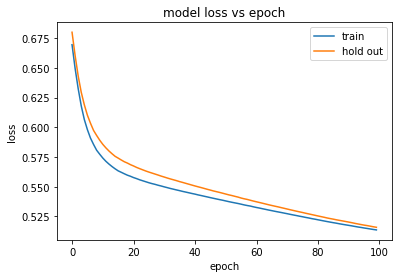

In [122]:
model=classification_model_config()
comp(model,0.001,False)
history=fit_model(model,100,x_train,y_train)
plot_model(history)

Epoch 1/100
18/18 [==============================] - 1s 10ms/step - loss: 0.1118 - val_loss: 0.0314
Epoch 2/100
18/18 [==============================] - 0s 4ms/step - loss: 0.0183 - val_loss: 0.0366
Epoch 3/100
18/18 [==============================] - 0s 4ms/step - loss: 0.0174 - val_loss: 0.0252
Epoch 4/100
18/18 [==============================] - 0s 4ms/step - loss: 0.0157 - val_loss: 0.0251
Epoch 5/100
18/18 [==============================] - 0s 4ms/step - loss: 0.0162 - val_loss: 0.0232
Epoch 6/100
18/18 [==============================] - 0s 4ms/step - loss: 0.0149 - val_loss: 0.0237
Epoch 7/100
18/18 [==============================] - 0s 6ms/step - loss: 0.0144 - val_loss: 0.0390
Epoch 8/100
18/18 [==============================] - 0s 9ms/step - loss: 0.0153 - val_loss: 0.0215
Epoch 9/100
18/18 [==============================] - 0s 5ms/step - loss: 0.0152 - val_loss: 0.0218
Epoch 10/100
18/18 [==============================] - 0s 4ms/step - loss: 0.0137 - val_loss: 0.0225
Epoch 11

Epoch 83/100
18/18 [==============================] - 0s 6ms/step - loss: 0.0106 - val_loss: 0.0187
Epoch 84/100
18/18 [==============================] - 0s 5ms/step - loss: 0.0107 - val_loss: 0.0201
Epoch 85/100
18/18 [==============================] - 0s 6ms/step - loss: 0.0104 - val_loss: 0.0213
Epoch 86/100
18/18 [==============================] - 0s 4ms/step - loss: 0.0103 - val_loss: 0.0181
Epoch 87/100
18/18 [==============================] - 0s 6ms/step - loss: 0.0103 - val_loss: 0.0195
Epoch 88/100
18/18 [==============================] - 0s 4ms/step - loss: 0.0106 - val_loss: 0.0174
Epoch 89/100
18/18 [==============================] - 0s 5ms/step - loss: 0.0101 - val_loss: 0.0200
Epoch 90/100
18/18 [==============================] - 0s 4ms/step - loss: 0.0105 - val_loss: 0.0177
Epoch 91/100
18/18 [==============================] - 0s 3ms/step - loss: 0.0100 - val_loss: 0.0194
Epoch 92/100
18/18 [==============================] - 0s 4ms/step - loss: 0.0104 - val_loss: 0.0184


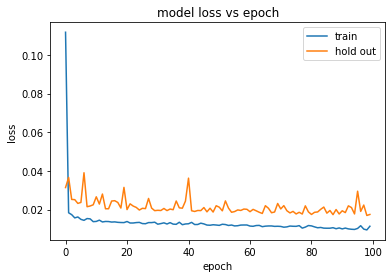

In [119]:
model=regression_model_config()
comp(model,0.1,True)
history=fit_model(model,100,x_train_reg,y_train_reg)
plot_model(history)

In [120]:
y_test_reg=loan_test['LoanAmount']
x_test_reg=loan_test.drop(['LoanAmount'],axis=1)

In [121]:
model.evaluate(x_test_reg,y_test_reg)

12/12 [==============================] - 0s 2ms/step - loss: 0.0116


0.011589603498578072